## Deep Learning - Images CIFAR10 dataset

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

c:\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
#Local downloaded CIFAR10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

### Load the CIFAR10 dataset (Locally)

In [3]:
file = r'D:/SYED/data/cifar10/data_batch_1'
data_batch_1 = unpickle(file)

In [5]:
print(type(data_batch_1))
print(data_batch_1.keys())
print("Labels:", set(data_batch_1['labels']))

<class 'dict'>
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
X_train = data_batch_1['data']
print(X_train.shape)
#So there are 10,000 images each having 3072 entries i.e. 32 x 32 x 3 
#or R-1024, G-1024, B-1024

(10000, 3072)


### Load the labels

In [9]:
meta_file = r'D:/SYED/data/cifar10/batches.meta'
meta_data = unpickle(meta_file)
print(type(meta_data))
print(meta_data.keys())
print("Label Names:", meta_data['label_names'] )

<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])
Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Reshape dataset

In [12]:
x_train = data_batch_1['data']
print("Shape before reshape:", x_train.shape)
# Reshape the whole image data
x_train = x_train.reshape(len(x_train),3,32,32)
print("Shape after reshape and before transpose:", x_train.shape)
# Transpose the whole data
x_train = x_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", x_train.shape)

Shape before reshape: (10000, 3072)
Shape after reshape and before transpose: (10000, 3, 32, 32)
Shape after reshape and transpose: (10000, 32, 32, 3)


## Visualize

Text(0.5, 1.0, 'frog')

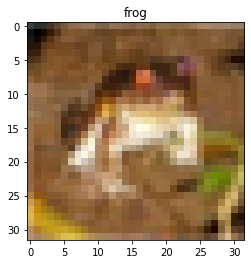

In [13]:
import matplotlib.pyplot as plt
# label names
label_name = meta_data['label_names']
# take first image
image = data_batch_1['data'][0]
# take first image label index
label = data_batch_1['labels'][0]
# Reshape the image
image = image.reshape(3,32,32)
# Transpose the image
image = image.transpose(1,2,0)
# Display the image
plt.imshow(image)
plt.title(label_name[label])

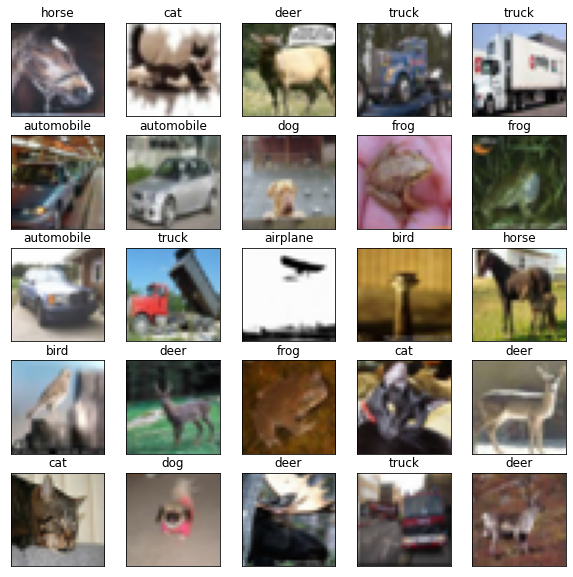

In [14]:
# Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
import numpy as np
# take the images data from batch data
images = data_batch_1['data']
# reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
# take labels of the images 
labels = data_batch_1['labels']
# label names of the images
label_names = meta_data['label_names']

# dispaly random images
# define row and column of figure
rows, columns = 5, 5
# take random image idex id
imageId = np.random.randint(0, len(images), rows * columns)
# take images for above random image ids
images = images[imageId]
# take labels for these images only
labels = [labels[i] for i in imageId]

# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(label_names[labels[i-1]]))
plt.show()

## Training Data

In [ ]:
file2 = r'D:/SYED/data/cifar10/test_batch'
test_data = unpickle(file2)
print(type(test_data))
print(test_data.keys())
print("Label Names:", test_data['labels'] )

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(x_train, y_train, 0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

In [ ]:
cnn.evaluate(x_test, y_test)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

In [ ]:
pic1 = x_test[15]
plt.imshow(pic1, cmap='Greys')

In [ ]:
y_pred.shape